<a href="https://colab.research.google.com/github/adil-ak/Deep_Learning_Projects/blob/main/CNN_Dog_or_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

x_train=np.loadtxt('/content/drive/MyDrive/Colab Notebooks/input.csv',delimiter=',')
y_train=np.loadtxt('labels.csv',delimiter=',')
x_test=np.loadtxt('input_test.csv',delimiter=',')
y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [ ]:
x_train.shape

(2000, 30000)

In [ ]:
y_train.shape

(2000,)

In [ ]:
x_train=x_train.reshape(len(x_train),100,100,3)
x_test=x_test.reshape(len(x_test),100,100,3)
y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)

In [ ]:
x_train.shape

(2000, 100, 100, 3)

In [ ]:
y_train.shape

(2000, 1)

In [ ]:
x_train=x_train/255
x_test=x_test/255

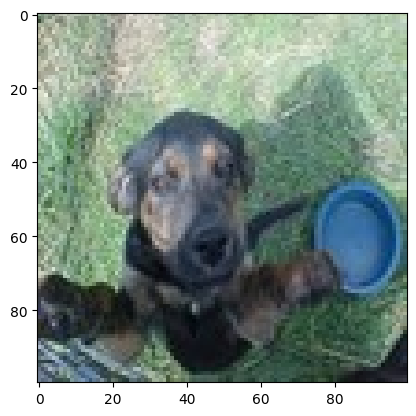

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3])

#CNN MODEL CREATION

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
model=tf.keras.models.Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 243ms/step - accuracy: 0.9947 - loss: 0.0287
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 222ms/step - accuracy: 0.9997 - loss: 0.0121
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 248ms/step - accuracy: 1.0000 - loss: 0.0080
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 241ms/step - accuracy: 1.0000 - loss: 0.0073
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 244ms/step - accuracy: 1.0000 - loss: 0.0059


In [ ]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6349 - loss: 1.2939


[1.1578166484832764, 0.6575000286102295]

#Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Dog


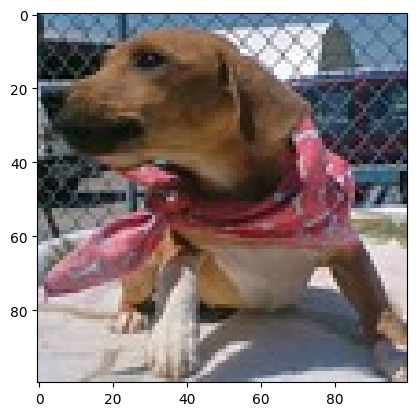

In [ ]:
plt.imshow(x_test[4])

y_pred=model.predict(x_test[4].reshape(1,100,100,3))
if y_pred>0.5:
  print("Cat")
else:
  print("Dog")

In [ ]:
y_test[4]

array([0.])